# 4. Train ConvNN Model: Regression Method


In the following steps, you will:

- Load the brown dwarf dataset used to train the ML models.
- Prepare the X and y variables to deploy the trained ML models.
- Visualize them for a few cases.

We will need the following modules from `TelescopeML`:

- **DeepBuilder**: to prepare the synthetic brown dwarf dataset and load the trained machine learning (ML) models.
- **Predictor**: to prepare the observational brown dwarf dataset and deploy the trained ML models.
- **StatVisAnalyzer**: to provide statistical tests and plotting functions.
- **IO_utils**: to provide functions to load the trained ML models.



In [1]:
from TelescopeML.DataMaster import *
from TelescopeML.DeepTrainer import *
from TelescopeML.Predictor import *
from TelescopeML.IO_utils import load_or_dump_trained_model_CNN
from TelescopeML.StatVisAnalyzer import *

No Bottleneck unit testing available.


Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

## 3.1 Data Preperation 

### 3.1.1 Load the Synthetic spectra - training dataset

We computed a low-resolution spectrum ($R$=200) utilizing atmopshric brown dwarfs grid model, [*Sonora-Bobcat*](https://arxiv.org/pdf/2107.07434.pdf) for spectral range $\sim$0.9-2.4 $\mu m$. An open-source atmospheric radiative transfer Python package, [*PICASO*](https://natashabatalha.github.io/picaso/) was employed for generating these datasets. This dataset encompass 30,888 synthetic spectra (or instances or rows). 


Each spectrum has 104 wavelengths (i.e., 0.897, 0.906, ..., 2.512 μm) and 4 output atmospheric parameters:

- gravity (log *g*)
- temperature (*T*<sub>eff</sub>)
- carbon-to-oxygen ratio (C/O)
- metallicity ([M/H])


In [2]:
import os 

__reference_data_path__ = os.getenv("TelescopeML_reference_data")
__reference_data_path__ 


# Note: insert the directory of the reference_data if you get an error reading the reference data!!!
# __reference_data_path__ = 'INSERT_DIRECTORY_OF_reference_data'


'/Users/egharibn/RESEARCH/ml/projects/TelescopeML_project/reference_data/'

 Load the dataset and check few instances 

In [3]:
train_BD = pd.read_csv(os.path.join(__reference_data_path__, 
                                    'training_datasets', 
                                    'browndwarf_R100_v4_newWL_v3.csv.bz2'), compression='bz2')
train_BD.head()

,gravity,temperature,c_o_ratio,metallicity,2.512,2.487,2.462,2.438,2.413,2.389,...,0.981,0.971,0.962,0.952,0.943,0.933,0.924,0.915,0.906,0.897
0,5.0,1100,0.25,-1.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
1,5.0,1100,0.25,-0.7,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
2,5.0,1100,0.25,-0.5,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
3,5.0,1100,0.25,-0.3,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08
4,5.0,1100,0.25,0.0,9.103045e-08,1.181658e-07,1.307868e-07,1.269229e-07,1.159179e-07,8.925110e-08,...,1.257751e-07,9.640859e-08,7.612550e-08,6.901364e-08,6.247359e-08,4.112384e-08,5.127995e-08,4.897355e-08,4.087795e-08,2.791689e-08


### 3.1.2 Check atmospheric parameters


- gravity (log *g*)
- temperature (*T*<sub>eff</sub>)
- carbon-to-oxygen ratio (C/O)
- metallicity ([M/H])

In [4]:
output_names = ['gravity', 'temperature', 'c_o_ratio', 'metallicity']
train_BD[output_names].head()

,gravity,temperature,c_o_ratio,metallicity
0,5.0,1100,0.25,-1.0
1,5.0,1100,0.25,-0.7
2,5.0,1100,0.25,-0.5
3,5.0,1100,0.25,-0.3
4,5.0,1100,0.25,0.0


In [5]:
wavelength_names = [item for item in train_BD.columns.to_list() if item not in output_names]
wavelength_names[:5]

['2.512', '2.487', '2.462', '2.438', '2.413']

In [6]:
wavelength_values = [float(item) for item in wavelength_names]
wavelength_values[:10]

[2.512, 2.487, 2.462, 2.438, 2.413, 2.389, 2.366, 2.342, 2.319, 2.296]

In [7]:
wl_synthetic = pd.read_csv(os.path.join(__reference_data_path__, 
                                        'training_datasets', 
                                        'wl.csv'))
wl_synthetic.head()

,wl
0,2.511960
1,2.486966
2,2.462220
3,2.437720
4,2.413464


### 3.1.3 Prepare Inputs and outputs for ML models (X,y)
- X: 104 wavelengths and their corresponding flux values 
- y: output variables: 'gravity', 'temperature',  'c_o_ratio', 'metallicity'

In [8]:
# Training  variables
X = train_BD.drop(
    columns=['gravity', 
             'temperature', 
             'c_o_ratio', 
             'metallicity'])


# Target/Output feature variables
y = train_BD[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]]


log-transform the 'temperature' variable toreduce the skewness of the data, making it more symmetric and normal-like for the ML model


In [9]:
y.loc[:, 'temperature'] = np.log10(y['temperature'])

In [10]:
# check the output variables
y.head()

,gravity,c_o_ratio,metallicity,temperature
0,5.0,0.25,-1.0,3.041393
1,5.0,0.25,-0.7,3.041393
2,5.0,0.25,-0.5,3.041393
3,5.0,0.25,-0.3,3.041393
4,5.0,0.25,0.0,3.041393


---

## 3.2 Build the CNN model and Processing the Data

Here we instintiate BuildRegressorCNN class from DeepBuilder module to prepare the datasets and take the trained CNN (Convolutional Neural Networks) for us:

- Take the synthetic datasets
- Process them, e.g.
    - Divide them to three sets: train, validation, and test sets
    - Scale y variables
    - Scale X variables
    - Create new features 
    

### 3.2.1 Instintiate BuildRegressorCNN class from DeepBuilder module

In [11]:
data_processor = DataProcessor( 
                                 flux_values=X.to_numpy(),
                                 wavelength_names=X.columns,
                                 wavelength_values=wavelength_values,
                                 output_values=y.to_numpy(),
                                 output_names=output_names,
                                 spectral_resolution=200,
                                 trained_ML_model=None,
                                 trained_ML_model_name='CNN',
                                )

### 3.2.2 Split the dataset into train, validate and test sets

In [12]:
data_processor.split_train_validation_test(test_size=0.1, 
                                             val_size=0.1, 
                                             random_state_=42,)

### 3.2.3 Standardize X Variables Row-wise 

In [13]:
# Scale the X features using MinMax Scaler
data_processor.standardize_X_row_wise()

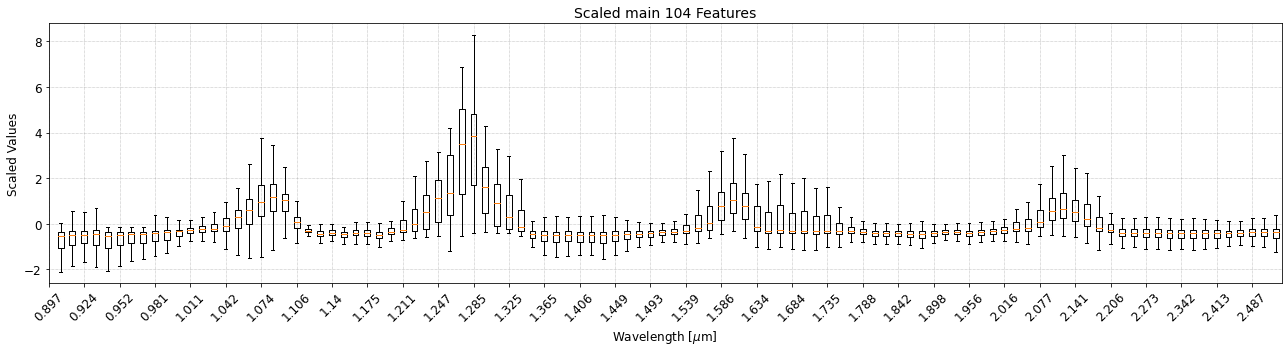

In [14]:
plot_boxplot(    
            data = data_processor.X_train_standardized_rowwise[:, ::-1],
            title='Scaled main 104 Features',
            xlabel='Wavelength [$\mu$m]',
            ylabel='Scaled Values',
            xticks_list=wavelength_names[::-1],
            fig_size=(18, 5),
            saved_file_name = 'Scaled_input_fluxes',
            __reference_data__ = __reference_data_path__,
            __save_plots__=True
    )

### 3.2.4 Standardize y Variables Column-wise 

In [15]:
# Standardize the y features using Standard Scaler
data_processor.standardize_y_column_wise()

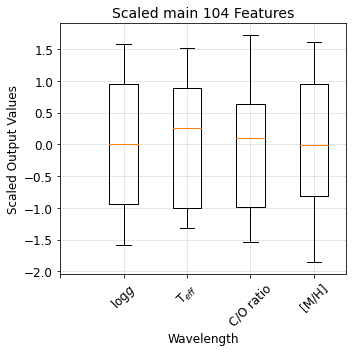

In [16]:
plot_boxplot(    
            data = data_processor.y_train_standardized_columnwise,
            title='Scaled main 104 Features',
            xlabel='Wavelength',
            ylabel='Scaled Output Values',
            xticks_list=['','$\log g$', 'T$_{eff}$', 'C/O ratio', '[M/H]'],
            fig_size=(5, 5),
            saved_file_name = 'Scaled_output_parameters',
            __reference_data__ = __reference_data_path__,
            __save_plots__=True
        )

### 3.2.5 Feature engeenering: Take Min and Max of each row (BD spectra) 

In [17]:
# train
data_processor.X_train_min = data_processor.X_train.min(axis=1)
data_processor.X_train_max = data_processor.X_train.max(axis=1)

# validation
data_processor.X_val_min = data_processor.X_val.min(axis=1)
data_processor.X_val_max = data_processor.X_val.max(axis=1)

# test
data_processor.X_test_min = data_processor.X_test.min(axis=1)
data_processor.X_test_max = data_processor.X_test.max(axis=1)

In [18]:
df_MinMax_train = pd.DataFrame((data_processor.X_train_min, data_processor.X_train_max)).T
df_MinMax_val = pd.DataFrame((data_processor.X_val_min, data_processor.X_val_max)).T
df_MinMax_test = pd.DataFrame((data_processor.X_test_min, data_processor.X_test_max)).T

In [19]:
df_MinMax_train.rename(columns={0:'min', 1:'max'}, inplace=True)
df_MinMax_val.rename(columns={0:'min', 1:'max'}, inplace=True)
df_MinMax_test.rename(columns={0:'min', 1:'max'}, inplace=True)

In [20]:
df_MinMax_train.head()

,min,max
0,8.265340e-12,3.445259e-08
1,8.080712e-22,8.397132e-14
2,2.734403e-07,8.632182e-06
3,4.414951e-16,3.373262e-10
4,3.722576e-07,6.859888e-06


### 3.2.6 Scale Min Max features - ColumnWise

In [21]:
data_processor.standardize_X_column_wise(
                                        output_indicator='Trained_StandardScaler_X_ColWise_MinMax',
                                        X_train = df_MinMax_train.to_numpy(),
                                        X_val   = df_MinMax_val.to_numpy(),
                                        X_test  = df_MinMax_test.to_numpy(),
                                        )

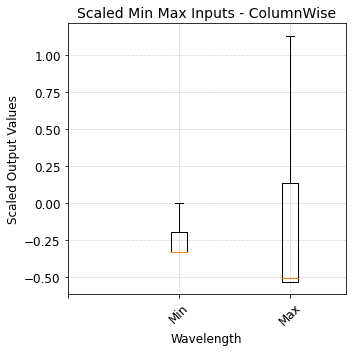

In [22]:
plot_boxplot(    
            data = data_processor.X_test_standardized_columnwise,
            title='Scaled Min Max Inputs - ColumnWise',
            xlabel='Wavelength',
            ylabel='Scaled Output Values',
            xticks_list= ['','Min','Max'],
            fig_size=(5, 5),
            saved_file_name = 'Scaled_input_Min_Max_fluxes',
            __reference_data__ = __reference_data_path__,
            __save_plots__=True
            )

## 3.3 Train CNN model

### 3.3.1 Instintiate *TrainRegressorCNN* class from *DeepTrainer* Module

<img src="../figures/ML_model.jpg"
     alt="ML pipeline"
     style="float: left; margin-right: 10px; width: 90%;" />


In [23]:
train_cnn_model = TrainRegressorCNN(
            # input dataset: StandardScaled instances  
            X1_train = data_processor.X_train_standardized_rowwise,
            X1_val   = data_processor.X_val_standardized_rowwise,
            X1_test  = data_processor.X_test_standardized_rowwise,

            # input dataset: Min Max of each instance  
            X2_train = data_processor.X_train_standardized_columnwise,
            X2_val   = data_processor.X_val_standardized_columnwise,
            X2_test  = data_processor.X_test_standardized_columnwise,


            # 1st target
            y1_train = data_processor.y_train_standardized_columnwise[:,0],
            y1_val   = data_processor.y_val_standardized_columnwise[:,0],
            y1_test  = data_processor.y_test_standardized_columnwise[:,0],

            # 2nd target
            y2_train = data_processor.y_train_standardized_columnwise[:,1],
            y2_val   = data_processor.y_val_standardized_columnwise[:,1],
            y2_test  = data_processor.y_test_standardized_columnwise[:,1],

            # 3rd target
            y3_train = data_processor.y_train_standardized_columnwise[:,2],
            y3_val   = data_processor.y_val_standardized_columnwise[:,2],
            y3_test  = data_processor.y_test_standardized_columnwise[:,2],

            # 4th target
            y4_train = data_processor.y_train_standardized_columnwise[:,3],
            y4_val   = data_processor.y_val_standardized_columnwise[:,3],
            y4_test  = data_processor.y_test_standardized_columnwise[:,3],
            )

### 3.3.2 Define the Hyperparameters

In [24]:
hyperparameters = {
         'Conv__MaxPooling1D': 3,
         'Conv__NumberBlocks': 2,
         'Conv__NumberLayers': 3,
         'Conv__filters': 32,
         'Conv__kernel_size': 4,
         'FC1__NumberLayers': 3,
         'FC1__dropout': 0.0013358917126831819,
         'FC1__units': 256,
         'FC2__NumberBlocks': 1,
         'FC2__NumberLayers': 4,
         'FC2__dropout': 0.0018989744374361271,
         'FC2__units': 128,
         'lr': 0.00018890368162236508
                 }

### 3.3.3 Build a CNN model

In [25]:
train_cnn_model.build_model(config=hyperparameters, )

Model: "model"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_1 (InputLayer)        [(None, 104, 1)]             0         []                            


 Conv__B1_L1 (Conv1D)        (None, 104, 32)              160       ['input_1[0][0]']             


 Conv__B1_L2 (Conv1D)        (None, 104, 128)             16512     ['Conv__B1_L1[0][0]']         


 Conv__B1_L3 (Conv1D)        (None, 104, 288)             147744    ['Conv__B1_L2[0][0]']         


 Conv__B1__MaxPooling1D (Ma  (None, 34, 288)              0         ['Conv__B1_L3[0][0]']         


 xPooling1D)                                                                                      


 Conv__B2_L1 (Conv1D)        (None, 34, 128)              147584    ['Conv__B1__MaxPooling1D[0][0]


                                                                    ']                            


 Conv__B2_L2 (Conv1D)        (None, 34, 288)              147744    ['Conv__B2_L1[0][0]']         


 Conv__B2_L3 (Conv1D)        (None, 34, 512)              590336    ['Conv__B2_L2[0][0]']         


 Conv__B2__MaxPooling1D (Ma  (None, 11, 512)              0         ['Conv__B2_L3[0][0]']         


 xPooling1D)                                                                                      


 flatten (Flatten)           (None, 5632)                 0         ['Conv__B2__MaxPooling1D[0][0]


                                                                    ']                            


 FC1__B1_L1 (Dense)          (None, 256)                  1442048   ['flatten[0][0]']             


 FC1__B1_L2 (Dense)          (None, 1024)                 263168    ['FC1__B1_L1[0][0]']          


 FC1__B1_L3 (Dense)          (None, 2304)                 2361600   ['FC1__B1_L2[0][0]']          


 FC1__B1_L3__Dropout (Dropo  (None, 2304)                 0         ['FC1__B1_L3[0][0]']          


 ut)                                                                                              


 input_2 (InputLayer)        [(None, 2)]                  0         []                            


 Concatenated_Layer (Concat  (None, 2306)                 0         ['FC1__B1_L3__Dropout[0][0]', 


 enate)                                                              'input_2[0][0]']             


 FC2__B1_L1 (Dense)          (None, 128)                  295296    ['Concatenated_Layer[0][0]']  


 FC2__B1_L2 (Dense)          (None, 512)                  66048     ['FC2__B1_L1[0][0]']          


 FC2__B1_L3 (Dense)          (None, 1152)                 590976    ['FC2__B1_L2[0][0]']          


 FC2__B1_L4 (Dense)          (None, 2048)                 2361344   ['FC2__B1_L3[0][0]']          


 FC2__B1_L4__Dropout (Dropo  (None, 2048)                 0         ['FC2__B1_L4[0][0]']          


 ut)                                                                                              


 output__gravity (Dense)     (None, 1)                    2049      ['FC2__B1_L4__Dropout[0][0]'] 


 output__c_o_ratio (Dense)   (None, 1)                    2049      ['FC2__B1_L4__Dropout[0][0]'] 


 output__metallicity (Dense  (None, 1)                    2049      ['FC2__B1_L4__Dropout[0][0]'] 


 )                                                                                                


 output__temperature (Dense  (None, 1)                    2049      ['FC2__B1_L4__Dropout[0][0]'] 


 )                                                                                                


Total params: 8438756 (32.19 MB)


Trainable params: 8438756 (32.19 MB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


None


### 3.3.4 Train the CNN model using the datasets

In [26]:
history, model =  train_cnn_model.fit_cnn_model(batch_size=1000,
                                                budget=2)

Epoch 1/2


 1/26 [>.............................] - ETA: 1:26 - loss: 4.0201 - output__gravity_loss: 1.1346 - output__c_o_ratio_loss: 0.8879 - output__metallicity_loss: 1.2016 - output__temperature_loss: 0.7958 - output__gravity_mae: 1.5855 - output__c_o_ratio_mae: 1.2931 - output__metallicity_mae: 1.6498 - output__temperature_mae: 1.2472

 2/26 [=>............................] - ETA: 24s - loss: 9.4940 - output__gravity_loss: 2.7603 - output__c_o_ratio_loss: 2.5063 - output__metallicity_loss: 2.0133 - output__temperature_loss: 2.2140 - output__gravity_mae: 3.2356 - output__c_o_ratio_mae: 2.9589 - output__metallicity_mae: 2.4866 - output__temperature_mae: 2.6897 

 3/26 [==>...........................] - ETA: 23s - loss: 7.1615 - output__gravity_loss: 2.1538 - output__c_o_ratio_loss: 1.8708 - output__metallicity_loss: 1.4994 - output__temperature_loss: 1.6376 - output__gravity_mae: 2.6092 - output__c_o_ratio_mae: 2.3152 - output__metallicity_mae: 1.9473 - output__temperature_mae: 2.0909

 4/26 [===>..........................] - ETA: 22s - loss: 6.2032 - output__gravity_loss: 2.1268 - output__c_o_ratio_loss: 1.5295 - output__metallicity_loss: 1.2330 - output__temperature_loss: 1.3139 - output__gravity_mae: 2.5910 - output__c_o_ratio_mae: 1.9616 - output__metallicity_mae: 1.6660 - output__temperature_mae: 1.7438

 5/26 [====>.........................] - ETA: 21s - loss: 5.4307 - output__gravity_loss: 1.8482 - output__c_o_ratio_loss: 1.3228 - output__metallicity_loss: 1.0997 - output__temperature_loss: 1.1599 - output__gravity_mae: 2.3017 - output__c_o_ratio_mae: 1.7480 - output__metallicity_mae: 1.5269 - output__temperature_mae: 1.5943

 6/26 [=====>........................] - ETA: 20s - loss: 4.8761 - output__gravity_loss: 1.7163 - output__c_o_ratio_loss: 1.1836 - output__metallicity_loss: 0.9703 - output__temperature_loss: 1.0060 - output__gravity_mae: 2.1664 - output__c_o_ratio_mae: 1.6044 - output__metallicity_mae: 1.3865 - output__temperature_mae: 1.4213

 7/26 [=======>......................] - ETA: 19s - loss: 4.4348 - output__gravity_loss: 1.5568 - output__c_o_ratio_loss: 1.0840 - output__metallicity_loss: 0.8751 - output__temperature_loss: 0.9190 - output__gravity_mae: 1.9988 - output__c_o_ratio_mae: 1.5025 - output__metallicity_mae: 1.2832 - output__temperature_mae: 1.3284

 8/26 [========>.....................] - ETA: 18s - loss: 4.0445 - output__gravity_loss: 1.4166 - output__c_o_ratio_loss: 1.0014 - output__metallicity_loss: 0.7999 - output__temperature_loss: 0.8266 - output__gravity_mae: 1.8524 - output__c_o_ratio_mae: 1.4178 - output__metallicity_mae: 1.1998 - output__temperature_mae: 1.2219

 9/26 [=========>....................] - ETA: 17s - loss: 3.7653 - output__gravity_loss: 1.3206 - output__c_o_ratio_loss: 0.9352 - output__metallicity_loss: 0.7436 - output__temperature_loss: 0.7659 - output__gravity_mae: 1.7518 - output__c_o_ratio_mae: 1.3492 - output__metallicity_mae: 1.1379 - output__temperature_mae: 1.1592

10/26 [==========>...................] - ETA: 16s - loss: 3.5144 - output__gravity_loss: 1.2385 - output__c_o_ratio_loss: 0.8851 - output__metallicity_loss: 0.6942 - output__temperature_loss: 0.6967 - output__gravity_mae: 1.6663 - output__c_o_ratio_mae: 1.2974 - output__metallicity_mae: 1.0824 - output__temperature_mae: 1.0748

11/26 [===========>..................] - ETA: 15s - loss: 3.3072 - output__gravity_loss: 1.1694 - output__c_o_ratio_loss: 0.8401 - output__metallicity_loss: 0.6537 - output__temperature_loss: 0.6439 - output__gravity_mae: 1.5954 - output__c_o_ratio_mae: 1.2508 - output__metallicity_mae: 1.0367 - output__temperature_mae: 1.0150

12/26 [============>.................] - ETA: 14s - loss: 3.1284 - output__gravity_loss: 1.1153 - output__c_o_ratio_loss: 0.8000 - output__metallicity_loss: 0.6178 - output__temperature_loss: 0.5952 - output__gravity_mae: 1.5394 - output__c_o_ratio_mae: 1.2088 - output__metallicity_mae: 0.9956 - output__temperature_mae: 0.9526

13/26 [==============>...............] - ETA: 13s - loss: 2.9733 - output__gravity_loss: 1.0623 - output__c_o_ratio_loss: 0.7694 - output__metallicity_loss: 0.5878 - output__temperature_loss: 0.5537 - output__gravity_mae: 1.4843 - output__c_o_ratio_mae: 1.1771 - output__metallicity_mae: 0.9620 - output__temperature_mae: 0.8994

14/26 [===============>..............] - ETA: 12s - loss: 2.8316 - output__gravity_loss: 1.0141 - output__c_o_ratio_loss: 0.7385 - output__metallicity_loss: 0.5619 - output__temperature_loss: 0.5171 - output__gravity_mae: 1.4333 - output__c_o_ratio_mae: 1.1446 - output__metallicity_mae: 0.9326 - output__temperature_mae: 0.8516

15/26 [================>.............] - ETA: 11s - loss: 2.7102 - output__gravity_loss: 0.9753 - output__c_o_ratio_loss: 0.7122 - output__metallicity_loss: 0.5376 - output__temperature_loss: 0.4850 - output__gravity_mae: 1.3923 - output__c_o_ratio_mae: 1.1159 - output__metallicity_mae: 0.9046 - output__temperature_mae: 0.8087

16/26 [=================>............] - ETA: 10s - loss: 2.5993 - output__gravity_loss: 0.9382 - output__c_o_ratio_loss: 0.6878 - output__metallicity_loss: 0.5166 - output__temperature_loss: 0.4566 - output__gravity_mae: 1.3528 - output__c_o_ratio_mae: 1.0898 - output__metallicity_mae: 0.8804 - output__temperature_mae: 0.7706

17/26 [==================>...........] - ETA: 9s - loss: 2.5003 - output__gravity_loss: 0.9056 - output__c_o_ratio_loss: 0.6654 - output__metallicity_loss: 0.4974 - output__temperature_loss: 0.4320 - output__gravity_mae: 1.3183 - output__c_o_ratio_mae: 1.0653 - output__metallicity_mae: 0.8577 - output__temperature_mae: 0.7381 

18/26 [===================>..........] - ETA: 8s - loss: 2.4091 - output__gravity_loss: 0.8762 - output__c_o_ratio_loss: 0.6429 - output__metallicity_loss: 0.4795 - output__temperature_loss: 0.4105 - output__gravity_mae: 1.2873 - output__c_o_ratio_mae: 1.0398 - output__metallicity_mae: 0.8370 - output__temperature_mae: 0.7102

19/26 [====================>.........] - ETA: 7s - loss: 2.3244 - output__gravity_loss: 0.8482 - output__c_o_ratio_loss: 0.6226 - output__metallicity_loss: 0.4632 - output__temperature_loss: 0.3904 - output__gravity_mae: 1.2573 - output__c_o_ratio_mae: 1.0168 - output__metallicity_mae: 0.8175 - output__temperature_mae: 0.6823

20/26 [======================>.......] - ETA: 6s - loss: 2.2463 - output__gravity_loss: 0.8218 - output__c_o_ratio_loss: 0.6031 - output__metallicity_loss: 0.4491 - output__temperature_loss: 0.3724 - output__gravity_mae: 1.2285 - output__c_o_ratio_mae: 0.9944 - output__metallicity_mae: 0.8009 - output__temperature_mae: 0.6581

21/26 [=======================>......] - ETA: 5s - loss: 2.1768 - output__gravity_loss: 0.7990 - output__c_o_ratio_loss: 0.5855 - output__metallicity_loss: 0.4359 - output__temperature_loss: 0.3563 - output__gravity_mae: 1.2042 - output__c_o_ratio_mae: 0.9737 - output__metallicity_mae: 0.7854 - output__temperature_mae: 0.6366

22/26 [========================>.....] - ETA: 4s - loss: 2.1104 - output__gravity_loss: 0.7774 - output__c_o_ratio_loss: 0.5684 - output__metallicity_loss: 0.4234 - output__temperature_loss: 0.3413 - output__gravity_mae: 1.1804 - output__c_o_ratio_mae: 0.9529 - output__metallicity_mae: 0.7702 - output__temperature_mae: 0.6158

23/26 [=========================>....] - ETA: 3s - loss: 2.0491 - output__gravity_loss: 0.7573 - output__c_o_ratio_loss: 0.5524 - output__metallicity_loss: 0.4121 - output__temperature_loss: 0.3273 - output__gravity_mae: 1.1587 - output__c_o_ratio_mae: 0.9338 - output__metallicity_mae: 0.7567 - output__temperature_mae: 0.5958

24/26 [==========================>...] - ETA: 2s - loss: 1.9922 - output__gravity_loss: 0.7391 - output__c_o_ratio_loss: 0.5369 - output__metallicity_loss: 0.4018 - output__temperature_loss: 0.3145 - output__gravity_mae: 1.1388 - output__c_o_ratio_mae: 0.9152 - output__metallicity_mae: 0.7442 - output__temperature_mae: 0.5773

25/26 [===========================>..] - ETA: 1s - loss: 1.9392 - output__gravity_loss: 0.7218 - output__c_o_ratio_loss: 0.5226 - output__metallicity_loss: 0.3919 - output__temperature_loss: 0.3028 - output__gravity_mae: 1.1199 - output__c_o_ratio_mae: 0.8981 - output__metallicity_mae: 0.7322 - output__temperature_mae: 0.5610

26/26 [==============================] - ETA: 0s - loss: 1.9383 - output__gravity_loss: 0.7215 - output__c_o_ratio_loss: 0.5224 - output__metallicity_loss: 0.3918 - output__temperature_loss: 0.3026 - output__gravity_mae: 1.1196 - output__c_o_ratio_mae: 0.8978 - output__metallicity_mae: 0.7321 - output__temperature_mae: 0.5607

26/26 [==============================] - 30s 1s/step - loss: 1.9383 - output__gravity_loss: 0.7215 - output__c_o_ratio_loss: 0.5224 - output__metallicity_loss: 0.3918 - output__temperature_loss: 0.3026 - output__gravity_mae: 1.1196 - output__c_o_ratio_mae: 0.8978 - output__metallicity_mae: 0.7321 - output__temperature_mae: 0.5607 - val_loss: 0.8164 - val_output__gravity_loss: 0.2981 - val_output__c_o_ratio_loss: 0.2383 - val_output__metallicity_loss: 0.2588 - val_output__temperature_loss: 0.0211 - val_output__gravity_mae: 0.6536 - val_output__c_o_ratio_mae: 0.5480 - val_output__metallicity_mae: 0.5965 - val_output__temperature_mae: 0.1541


Epoch 2/2


 1/26 [>.............................] - ETA: 26s - loss: 0.8075 - output__gravity_loss: 0.2984 - output__c_o_ratio_loss: 0.2343 - output__metallicity_loss: 0.2523 - output__temperature_loss: 0.0225 - output__gravity_mae: 0.6558 - output__c_o_ratio_mae: 0.5419 - output__metallicity_mae: 0.5881 - output__temperature_mae: 0.1605

 2/26 [=>............................] - ETA: 25s - loss: 0.7445 - output__gravity_loss: 0.2959 - output__c_o_ratio_loss: 0.2166 - output__metallicity_loss: 0.2086 - output__temperature_loss: 0.0234 - output__gravity_mae: 0.6487 - output__c_o_ratio_mae: 0.5270 - output__metallicity_mae: 0.5293 - output__temperature_mae: 0.1596

 3/26 [==>...........................] - ETA: 24s - loss: 0.7608 - output__gravity_loss: 0.2997 - output__c_o_ratio_loss: 0.2095 - output__metallicity_loss: 0.2299 - output__temperature_loss: 0.0217 - output__gravity_mae: 0.6539 - output__c_o_ratio_mae: 0.5240 - output__metallicity_mae: 0.5634 - output__temperature_mae: 0.1534

 4/26 [===>..........................] - ETA: 23s - loss: 0.7299 - output__gravity_loss: 0.2975 - output__c_o_ratio_loss: 0.1971 - output__metallicity_loss: 0.2105 - output__temperature_loss: 0.0248 - output__gravity_mae: 0.6511 - output__c_o_ratio_mae: 0.5042 - output__metallicity_mae: 0.5320 - output__temperature_mae: 0.1680

 5/26 [====>.........................] - ETA: 22s - loss: 0.7256 - output__gravity_loss: 0.2947 - output__c_o_ratio_loss: 0.1979 - output__metallicity_loss: 0.2084 - output__temperature_loss: 0.0246 - output__gravity_mae: 0.6480 - output__c_o_ratio_mae: 0.5044 - output__metallicity_mae: 0.5282 - output__temperature_mae: 0.1685

 6/26 [=====>........................] - ETA: 21s - loss: 0.7054 - output__gravity_loss: 0.2896 - output__c_o_ratio_loss: 0.1893 - output__metallicity_loss: 0.1991 - output__temperature_loss: 0.0274 - output__gravity_mae: 0.6415 - output__c_o_ratio_mae: 0.4925 - output__metallicity_mae: 0.5137 - output__temperature_mae: 0.1796

 7/26 [=======>......................] - ETA: 20s - loss: 0.6949 - output__gravity_loss: 0.2871 - output__c_o_ratio_loss: 0.1873 - output__metallicity_loss: 0.1936 - output__temperature_loss: 0.0268 - output__gravity_mae: 0.6401 - output__c_o_ratio_mae: 0.4904 - output__metallicity_mae: 0.5059 - output__temperature_mae: 0.1776

 8/26 [========>.....................] - ETA: 19s - loss: 0.6883 - output__gravity_loss: 0.2848 - output__c_o_ratio_loss: 0.1833 - output__metallicity_loss: 0.1894 - output__temperature_loss: 0.0307 - output__gravity_mae: 0.6371 - output__c_o_ratio_mae: 0.4844 - output__metallicity_mae: 0.4998 - output__temperature_mae: 0.1910

 9/26 [=========>....................] - ETA: 18s - loss: 0.6751 - output__gravity_loss: 0.2829 - output__c_o_ratio_loss: 0.1785 - output__metallicity_loss: 0.1843 - output__temperature_loss: 0.0294 - output__gravity_mae: 0.6345 - output__c_o_ratio_mae: 0.4777 - output__metallicity_mae: 0.4913 - output__temperature_mae: 0.1861

10/26 [==========>...................] - ETA: 17s - loss: 0.6680 - output__gravity_loss: 0.2809 - output__c_o_ratio_loss: 0.1745 - output__metallicity_loss: 0.1816 - output__temperature_loss: 0.0310 - output__gravity_mae: 0.6317 - output__c_o_ratio_mae: 0.4718 - output__metallicity_mae: 0.4862 - output__temperature_mae: 0.1935

11/26 [===========>..................] - ETA: 16s - loss: 0.6579 - output__gravity_loss: 0.2799 - output__c_o_ratio_loss: 0.1705 - output__metallicity_loss: 0.1773 - output__temperature_loss: 0.0303 - output__gravity_mae: 0.6310 - output__c_o_ratio_mae: 0.4654 - output__metallicity_mae: 0.4798 - output__temperature_mae: 0.1912

12/26 [============>.................] - ETA: 15s - loss: 0.6485 - output__gravity_loss: 0.2773 - output__c_o_ratio_loss: 0.1679 - output__metallicity_loss: 0.1727 - output__temperature_loss: 0.0306 - output__gravity_mae: 0.6271 - output__c_o_ratio_mae: 0.4613 - output__metallicity_mae: 0.4727 - output__temperature_mae: 0.1935

13/26 [==============>...............] - ETA: 14s - loss: 0.6404 - output__gravity_loss: 0.2748 - output__c_o_ratio_loss: 0.1649 - output__metallicity_loss: 0.1703 - output__temperature_loss: 0.0304 - output__gravity_mae: 0.6231 - output__c_o_ratio_mae: 0.4571 - output__metallicity_mae: 0.4686 - output__temperature_mae: 0.1935

14/26 [===============>..............] - ETA: 13s - loss: 0.6300 - output__gravity_loss: 0.2716 - output__c_o_ratio_loss: 0.1618 - output__metallicity_loss: 0.1670 - output__temperature_loss: 0.0296 - output__gravity_mae: 0.6180 - output__c_o_ratio_mae: 0.4525 - output__metallicity_mae: 0.4633 - output__temperature_mae: 0.1908

15/26 [================>.............] - ETA: 11s - loss: 0.6218 - output__gravity_loss: 0.2689 - output__c_o_ratio_loss: 0.1585 - output__metallicity_loss: 0.1648 - output__temperature_loss: 0.0296 - output__gravity_mae: 0.6141 - output__c_o_ratio_mae: 0.4469 - output__metallicity_mae: 0.4594 - output__temperature_mae: 0.1916

16/26 [=================>............] - ETA: 10s - loss: 0.6132 - output__gravity_loss: 0.2659 - output__c_o_ratio_loss: 0.1554 - output__metallicity_loss: 0.1634 - output__temperature_loss: 0.0285 - output__gravity_mae: 0.6099 - output__c_o_ratio_mae: 0.4418 - output__metallicity_mae: 0.4569 - output__temperature_mae: 0.1874

17/26 [==================>...........] - ETA: 9s - loss: 0.6051 - output__gravity_loss: 0.2632 - output__c_o_ratio_loss: 0.1525 - output__metallicity_loss: 0.1614 - output__temperature_loss: 0.0281 - output__gravity_mae: 0.6062 - output__c_o_ratio_mae: 0.4370 - output__metallicity_mae: 0.4540 - output__temperature_mae: 0.1858 

18/26 [===================>..........] - ETA: 8s - loss: 0.5969 - output__gravity_loss: 0.2601 - output__c_o_ratio_loss: 0.1494 - output__metallicity_loss: 0.1599 - output__temperature_loss: 0.0275 - output__gravity_mae: 0.6016 - output__c_o_ratio_mae: 0.4320 - output__metallicity_mae: 0.4521 - output__temperature_mae: 0.1837

19/26 [====================>.........] - ETA: 7s - loss: 0.5892 - output__gravity_loss: 0.2578 - output__c_o_ratio_loss: 0.1467 - output__metallicity_loss: 0.1579 - output__temperature_loss: 0.0267 - output__gravity_mae: 0.5983 - output__c_o_ratio_mae: 0.4278 - output__metallicity_mae: 0.4489 - output__temperature_mae: 0.1803

20/26 [======================>.......] - ETA: 6s - loss: 0.5821 - output__gravity_loss: 0.2544 - output__c_o_ratio_loss: 0.1441 - output__metallicity_loss: 0.1572 - output__temperature_loss: 0.0264 - output__gravity_mae: 0.5935 - output__c_o_ratio_mae: 0.4232 - output__metallicity_mae: 0.4481 - output__temperature_mae: 0.1791

21/26 [=======================>......] - ETA: 5s - loss: 0.5750 - output__gravity_loss: 0.2516 - output__c_o_ratio_loss: 0.1415 - output__metallicity_loss: 0.1558 - output__temperature_loss: 0.0261 - output__gravity_mae: 0.5895 - output__c_o_ratio_mae: 0.4189 - output__metallicity_mae: 0.4464 - output__temperature_mae: 0.1785

22/26 [========================>.....] - ETA: 4s - loss: 0.5687 - output__gravity_loss: 0.2487 - output__c_o_ratio_loss: 0.1399 - output__metallicity_loss: 0.1543 - output__temperature_loss: 0.0258 - output__gravity_mae: 0.5855 - output__c_o_ratio_mae: 0.4166 - output__metallicity_mae: 0.4441 - output__temperature_mae: 0.1775

23/26 [=========================>....] - ETA: 3s - loss: 0.5625 - output__gravity_loss: 0.2463 - output__c_o_ratio_loss: 0.1384 - output__metallicity_loss: 0.1525 - output__temperature_loss: 0.0254 - output__gravity_mae: 0.5820 - output__c_o_ratio_mae: 0.4135 - output__metallicity_mae: 0.4413 - output__temperature_mae: 0.1762

24/26 [==========================>...] - ETA: 2s - loss: 0.5553 - output__gravity_loss: 0.2431 - output__c_o_ratio_loss: 0.1364 - output__metallicity_loss: 0.1511 - output__temperature_loss: 0.0248 - output__gravity_mae: 0.5770 - output__c_o_ratio_mae: 0.4102 - output__metallicity_mae: 0.4389 - output__temperature_mae: 0.1734

25/26 [===========================>..] - ETA: 1s - loss: 0.5493 - output__gravity_loss: 0.2405 - output__c_o_ratio_loss: 0.1345 - output__metallicity_loss: 0.1495 - output__temperature_loss: 0.0248 - output__gravity_mae: 0.5731 - output__c_o_ratio_mae: 0.4072 - output__metallicity_mae: 0.4366 - output__temperature_mae: 0.1739

26/26 [==============================] - ETA: 0s - loss: 0.5491 - output__gravity_loss: 0.2404 - output__c_o_ratio_loss: 0.1344 - output__metallicity_loss: 0.1495 - output__temperature_loss: 0.0247 - output__gravity_mae: 0.5730 - output__c_o_ratio_mae: 0.4071 - output__metallicity_mae: 0.4364 - output__temperature_mae: 0.1739

26/26 [==============================] - 29s 1s/step - loss: 0.5491 - output__gravity_loss: 0.2404 - output__c_o_ratio_loss: 0.1344 - output__metallicity_loss: 0.1495 - output__temperature_loss: 0.0247 - output__gravity_mae: 0.5730 - output__c_o_ratio_mae: 0.4071 - output__metallicity_mae: 0.4364 - output__temperature_mae: 0.1739 - val_loss: 0.3925 - val_output__gravity_loss: 0.1658 - val_output__c_o_ratio_loss: 0.0952 - val_output__metallicity_loss: 0.1202 - val_output__temperature_loss: 0.0113 - val_output__gravity_mae: 0.4606 - val_output__c_o_ratio_mae: 0.3384 - val_output__metallicity_mae: 0.3967 - val_output__temperature_mae: 0.1180


### 3.3.5 Check the Trained CNN Archeticture and Summary

Checking the architecture of a CNN and its summary is importnat because it provide insights about: 
- Model Design and Structure
- Model complexity
- Hyperparameter Tuning:

In [27]:
data_processor.trained_ML_model = model
data_processor.history = history

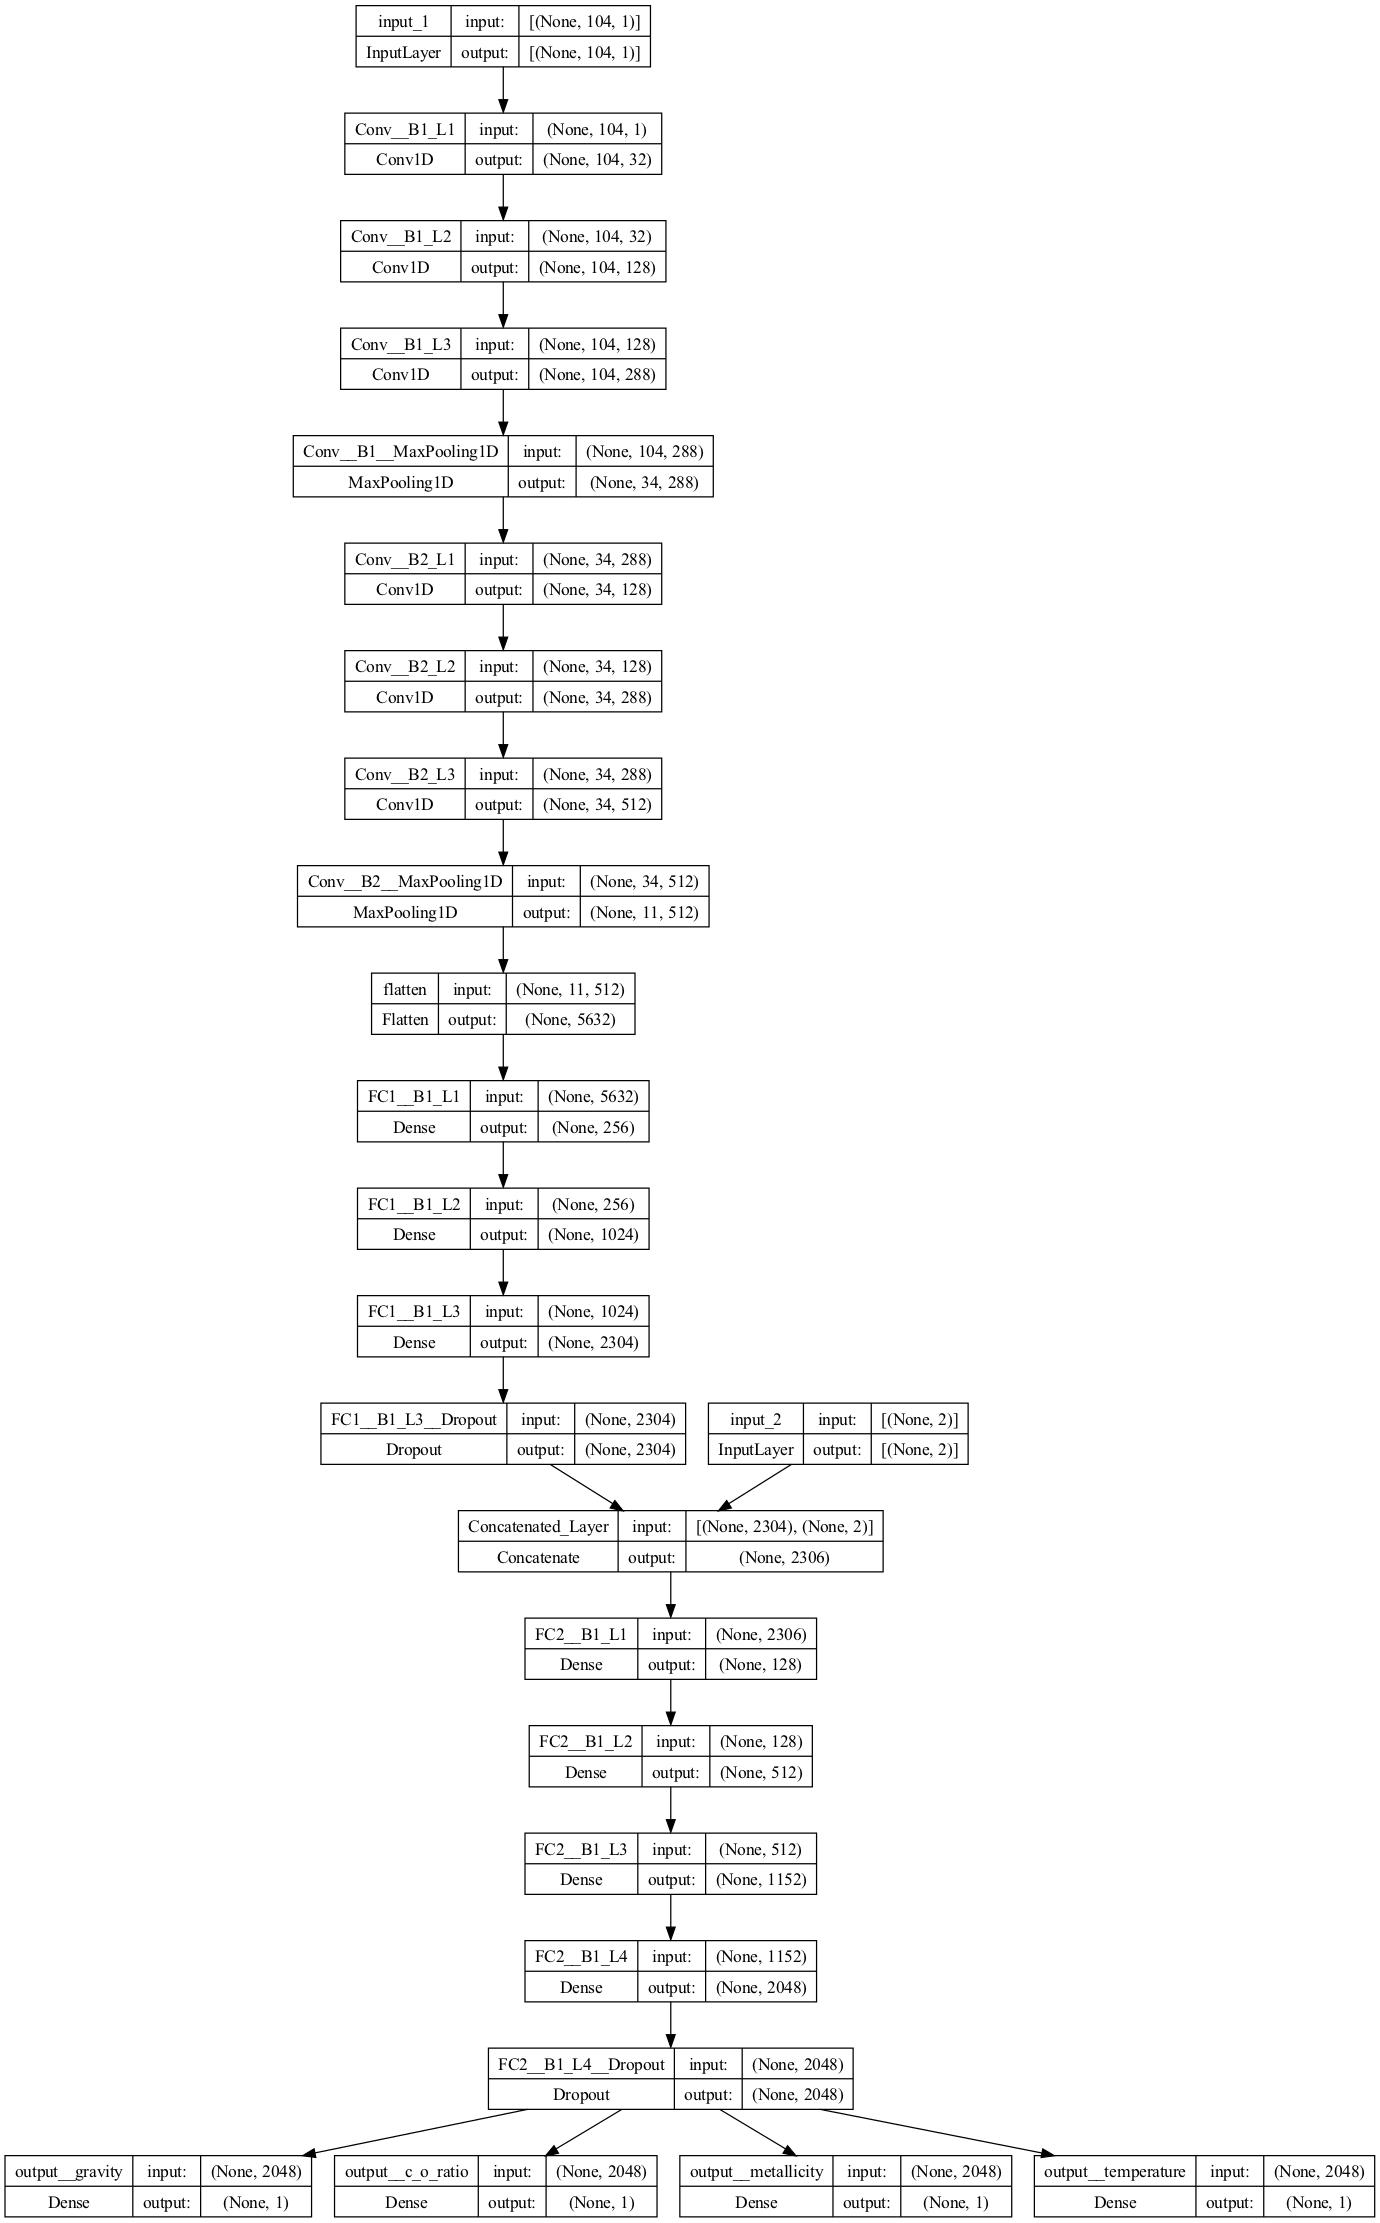

In [28]:
tf.keras.utils.plot_model(
                    train_cnn_model.model,
                    to_file="model.png",
                    show_shapes=True,
                    show_dtype=False,
                    show_layer_names=True,
                    rankdir="TB",
                    expand_nested=True,
                    dpi=90,
                    layer_range=None,
                        )

### 3.3.6 Trained Model Outcomes

Note: This is not the final trained model because the budget is very low and the batch number is very high. For this reason, we add "_TEST" to the end of the model name, but we will not be using it.


In [29]:
load_or_dump_trained_model_CNN( trained_model = data_processor,
                                                        output_indicator='tuned_bohb_batch32_v3_1000epoch_out10_TEST',
                                                        load_or_dump = 'dump')

/usr/local/anaconda3/envs/dl2/lib/python3.9/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 3.4 Check the performance of the Trained Model

### 3.4.1 Load the Saved Trained CNN Models

In [30]:
loaded_model, history = load_or_dump_trained_model_CNN(output_indicator='tuned_bohb_batch32_v3_1000epoch_out10',
                                                      load_or_dump = 'load')

In [31]:
train_cnn_model.trained_model = loaded_model
train_cnn_model.trained_model_history = history

### 3.4.2 Double-check the Trained CNN Archeticture and Summary

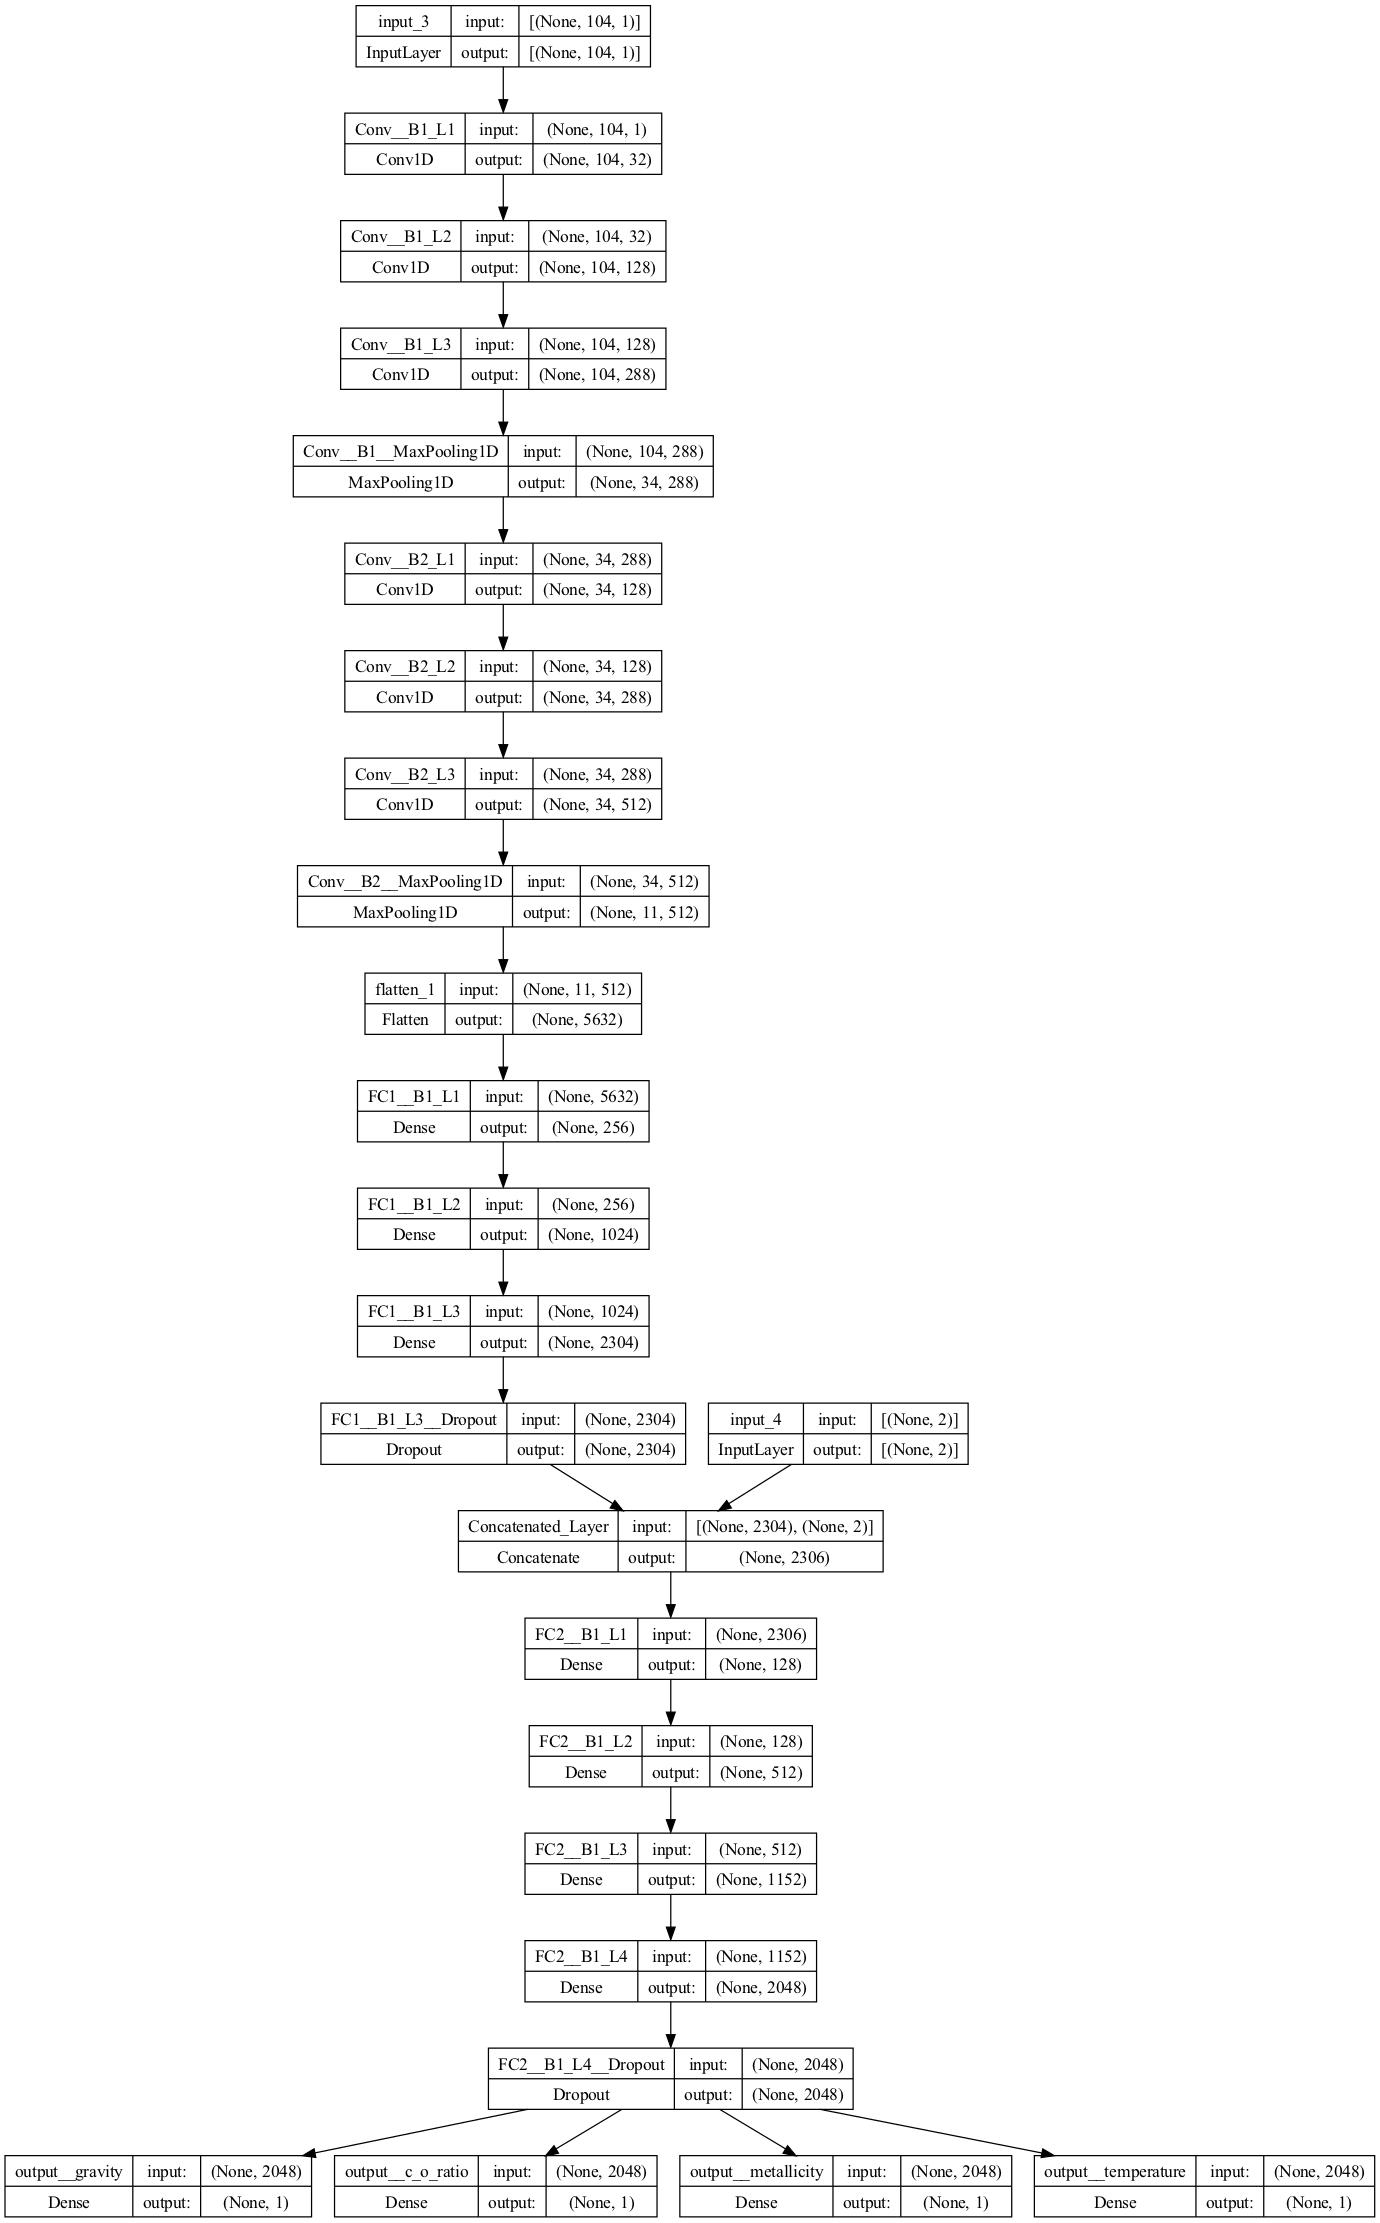

In [32]:
tf.keras.utils.plot_model(
                        train_cnn_model.trained_model,
                        # to_file="model.png",
                        show_shapes=True,
                        show_dtype=False,
                        show_layer_names=True,
                        rankdir="TB",
                        expand_nested=True,
                        dpi=90,
                        layer_range=None,
)

In [33]:
train_cnn_model.trained_model.summary()

Model: "model_1"


__________________________________________________________________________________________________


 Layer (type)                Output Shape                 Param #   Connected to                  


 input_3 (InputLayer)        [(None, 104, 1)]             0         []                            


 Conv__B1_L1 (Conv1D)        (None, 104, 32)              160       ['input_3[0][0]']             


 Conv__B1_L2 (Conv1D)        (None, 104, 128)             16512     ['Conv__B1_L1[0][0]']         


 Conv__B1_L3 (Conv1D)        (None, 104, 288)             147744    ['Conv__B1_L2[0][0]']         


 Conv__B1__MaxPooling1D (Ma  (None, 34, 288)              0         ['Conv__B1_L3[0][0]']         


 xPooling1D)                                                                                      


 Conv__B2_L1 (Conv1D)        (None, 34, 128)              147584    ['Conv__B1__MaxPooling1D[0][0]


                                                                    ']                            


 Conv__B2_L2 (Conv1D)        (None, 34, 288)              147744    ['Conv__B2_L1[0][0]']         


 Conv__B2_L3 (Conv1D)        (None, 34, 512)              590336    ['Conv__B2_L2[0][0]']         


 Conv__B2__MaxPooling1D (Ma  (None, 11, 512)              0         ['Conv__B2_L3[0][0]']         


 xPooling1D)                                                                                      


 flatten_1 (Flatten)         (None, 5632)                 0         ['Conv__B2__MaxPooling1D[0][0]


                                                                    ']                            


 FC1__B1_L1 (Dense)          (None, 256)                  1442048   ['flatten_1[0][0]']           


 FC1__B1_L2 (Dense)          (None, 1024)                 263168    ['FC1__B1_L1[0][0]']          


 FC1__B1_L3 (Dense)          (None, 2304)                 2361600   ['FC1__B1_L2[0][0]']          


 FC1__B1_L3__Dropout (Dropo  (None, 2304)                 0         ['FC1__B1_L3[0][0]']          


 ut)                                                                                              


 input_4 (InputLayer)        [(None, 2)]                  0         []                            


 Concatenated_Layer (Concat  (None, 2306)                 0         ['FC1__B1_L3__Dropout[0][0]', 


 enate)                                                              'input_4[0][0]']             


 FC2__B1_L1 (Dense)          (None, 128)                  295296    ['Concatenated_Layer[0][0]']  


 FC2__B1_L2 (Dense)          (None, 512)                  66048     ['FC2__B1_L1[0][0]']          


 FC2__B1_L3 (Dense)          (None, 1152)                 590976    ['FC2__B1_L2[0][0]']          


 FC2__B1_L4 (Dense)          (None, 2048)                 2361344   ['FC2__B1_L3[0][0]']          


 FC2__B1_L4__Dropout (Dropo  (None, 2048)                 0         ['FC2__B1_L4[0][0]']          


 ut)                                                                                              


 output__gravity (Dense)     (None, 1)                    2049      ['FC2__B1_L4__Dropout[0][0]'] 


 output__c_o_ratio (Dense)   (None, 1)                    2049      ['FC2__B1_L4__Dropout[0][0]'] 


 output__metallicity (Dense  (None, 1)                    2049      ['FC2__B1_L4__Dropout[0][0]'] 


 )                                                                                                


 output__temperature (Dense  (None, 1)                    2049      ['FC2__B1_L4__Dropout[0][0]'] 


 )                                                                                                


Total params: 8438756 (32.19 MB)


Trainable params: 8438756 (32.19 MB)


Non-trainable params: 0 (0.00 Byte)


__________________________________________________________________________________________________


### 3.4.3  Check the training history through *Loss* metric

In [34]:
# train_cnn_model.trained_model_history
plot_ML_model_loss_bokeh(trained_ML_model_history = train_cnn_model.trained_model_history,
                title = 'Hyperparameter-Tuned CNN model')

### 3.4.4 Plot the Performance of the trained CNN models - Regression metrics
- Plot predicted against actual scatter plots for all parameters 
- Plot Residual histograms (predicted - Actual)
- Report regression metrics: R$^2$ and skewness for training and test sets

  1/131 [..............................] - ETA: 28s

  2/131 [..............................] - ETA: 7s 

  4/131 [..............................] - ETA: 6s

  6/131 [>.............................] - ETA: 6s

  7/131 [>.............................] - ETA: 6s

  8/131 [>.............................] - ETA: 6s

  9/131 [=>............................] - ETA: 6s

 11/131 [=>............................] - ETA: 5s

 13/131 [=>............................] - ETA: 5s

 15/131 [==>...........................] - ETA: 5s

 17/131 [==>...........................] - ETA: 5s

 19/131 [===>..........................] - ETA: 5s

 20/131 [===>..........................] - ETA: 5s

 22/131 [====>.........................] - ETA: 5s

 23/131 [====>.........................] - ETA: 5s

 24/131 [====>.........................] - ETA: 5s

 26/131 [====>.........................] - ETA: 5s

 28/131 [=====>........................] - ETA: 4s

 29/131 [=====>........................] - ETA: 4s

 31/131 [======>.......................] - ETA: 4s

 32/131 [======>.......................] - ETA: 4s

 33/131 [======>.......................] - ETA: 4s

 34/131 [======>.......................] - ETA: 4s

 35/131 [=======>......................] - ETA: 4s

 36/131 [=======>......................] - ETA: 4s

 37/131 [=======>......................] - ETA: 4s

 39/131 [=======>......................] - ETA: 4s

 40/131 [========>.....................] - ETA: 4s

 41/131 [========>.....................] - ETA: 4s

 42/131 [========>.....................] - ETA: 4s

 44/131 [=========>....................] - ETA: 4s

 45/131 [=========>....................] - ETA: 4s

 47/131 [=========>....................] - ETA: 4s

 49/131 [==========>...................] - ETA: 4s

 51/131 [==========>...................] - ETA: 3s

 53/131 [===========>..................] - ETA: 3s

 54/131 [===========>..................] - ETA: 3s

 55/131 [===========>..................] - ETA: 3s

 56/131 [===========>..................] - ETA: 3s

 58/131 [============>.................] - ETA: 3s

 60/131 [============>.................] - ETA: 3s

 61/131 [============>.................] - ETA: 3s

 63/131 [=============>................] - ETA: 3s

 64/131 [=============>................] - ETA: 3s

 65/131 [=============>................] - ETA: 3s

 66/131 [==============>...............] - ETA: 3s

 68/131 [==============>...............] - ETA: 3s

 69/131 [==============>...............] - ETA: 3s

 70/131 [===============>..............] - ETA: 3s

 71/131 [===============>..............] - ETA: 3s

 73/131 [===============>..............] - ETA: 2s

 75/131 [================>.............] - ETA: 2s

 77/131 [================>.............] - ETA: 2s

 79/131 [=================>............] - ETA: 2s

 80/131 [=================>............] - ETA: 2s

 82/131 [=================>............] - ETA: 2s

 84/131 [==================>...........] - ETA: 2s

 85/131 [==================>...........] - ETA: 2s

 86/131 [==================>...........] - ETA: 2s

 88/131 [===================>..........] - ETA: 2s

 90/131 [===================>..........] - ETA: 2s

 92/131 [====================>.........] - ETA: 1s

 93/131 [====================>.........] - ETA: 1s

 94/131 [====================>.........] - ETA: 1s

 96/131 [====================>.........] - ETA: 1s

 97/131 [=====================>........] - ETA: 1s

 98/131 [=====================>........] - ETA: 1s

 99/131 [=====================>........] - ETA: 1s

100/131 [=====================>........] - ETA: 1s

102/131 [======================>.......] - ETA: 1s

103/131 [======================>.......] - ETA: 1s

104/131 [======================>.......] - ETA: 1s

105/131 [=======================>......] - ETA: 1s

107/131 [=======================>......] - ETA: 1s

108/131 [=======================>......] - ETA: 1s

109/131 [=======================>......] - ETA: 1s

111/131 [========================>.....] - ETA: 1s

112/131 [========================>.....] - ETA: 0s

114/131 [=========================>....] - ETA: 0s

115/131 [=========================>....] - ETA: 0s

117/131 [=========================>....] - ETA: 0s

118/131 [==========================>...] - ETA: 0s

120/131 [==========================>...] - ETA: 0s

121/131 [==========================>...] - ETA: 0s

122/131 [==========================>...] - ETA: 0s

123/131 [===========================>..] - ETA: 0s

125/131 [===========================>..] - ETA: 0s

126/131 [===========================>..] - ETA: 0s

127/131 [============================>.] - ETA: 0s

128/131 [============================>.] - ETA: 0s

129/131 [============================>.] - ETA: 0s

131/131 [==============================] - ETA: 0s

131/131 [==============================] - 7s 51ms/step


 1/17 [>.............................] - ETA: 0s

 2/17 [==>...........................] - ETA: 0s

 3/17 [====>.........................] - ETA: 0s

 5/17 [=======>......................] - ETA: 0s

 7/17 [===========>..................] - ETA: 0s

 8/17 [=============>................] - ETA: 0s

 9/17 [==============>...............] - ETA: 0s

11/17 [==================>...........] - ETA: 0s

12/17 [====================>.........] - ETA: 0s

14/17 [=======================>......] - ETA: 0s

15/17 [=========================>....] - ETA: 0s

16/17 [===========================>..] - ETA: 0s

17/17 [==============================] - 1s 48ms/step


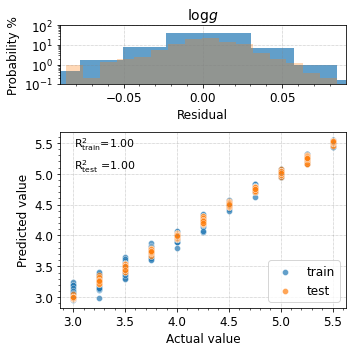

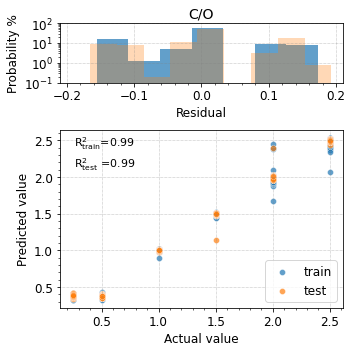

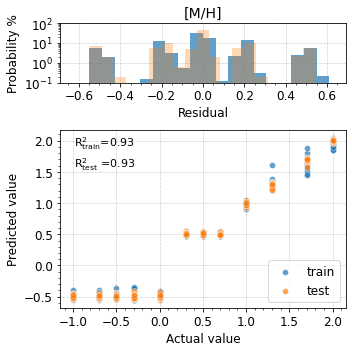

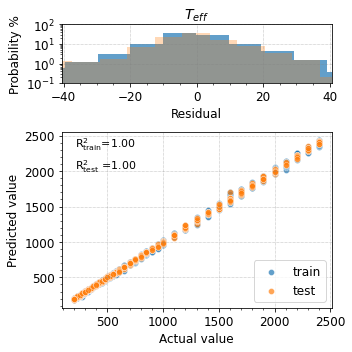

In [35]:
i = 6
plot_regression_report(
                    trained_ML_model = train_cnn_model.trained_model,
                    trained_DataProcessor = data_processor,
                    Xtrain = [data_processor.X_train_standardized_rowwise[::i],
                              data_processor.X_train_standardized_columnwise[::i]],

                    Xtest  = [data_processor.X_test_standardized_rowwise[::i], 
                              data_processor.X_test_standardized_columnwise[::i]],

                    ytrain = data_processor.y_train_standardized_columnwise[::i],

                    ytest  = data_processor.y_test_standardized_columnwise[::i],

                    target_i = 4,

                    xy_top   = [0.05, 0.7],
                    xy_bottom= [0.05, 0.85],
                    __reference_data__ = __reference_data_path__,
                    __print_results__ = False,       
                    __save_plots__ = True
                 )

---